In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
wait_times = pd.DataFrame(data=[[30, 52, 62, 40, 16],[5*i for i in range(1,6)], [0.15,0.26, 0.31, 0.20, 0.08]],
    index=['number of students', 'wait time', 'probability'])

In [52]:
wait_times

,0,1,2,3,4
number of students,30.00,52.00,62.00,40.0,16.00
wait time,5.00,10.00,15.00,20.0,25.00
probability,0.15,0.26,0.31,0.2,0.08


<AxesSubplot: >

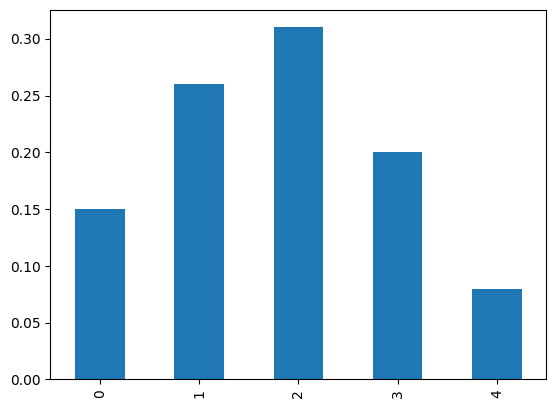

In [35]:
wait_times.loc['probability'].plot(kind='bar')

In [53]:
wait_times.loc['total minutes'] = wait_times.loc['number of students'] * wait_times.loc['wait time']

In [54]:
wait_times

,0,1,2,3,4
number of students,30.00,52.00,62.00,40.0,16.00
wait time,5.00,10.00,15.00,20.0,25.00
probability,0.15,0.26,0.31,0.2,0.08
total minutes,150.00,520.00,930.00,800.0,400.00


The mean is equal to the sum of all the values of $x$ times their probabilities.

 $\mu_x = \frac{\sum{x \cdot n_x}}{n} $

Another term that describes the mean is expected value.


In [65]:
wait_times.loc['total minutes'].sum() / wait_times.loc['number of students'].sum()

14.0

$\huge{\mu_x = \sum{x\cdot p(x)}}$



In [66]:
(wait_times.loc['wait time'] * wait_times.loc['probability']).sum()

14.0

### Try it: short-term parking

In [70]:
parking_times = [0.5, 1.0, 1.5, 2.0]
probability = [0.15, 0.45, 0.3, 0.1]

data = {
    'parking times': parking_times, 
    'probability': probability
}

df = pd.DataFrame(data)

In [78]:
(df['parking times'] * df['probability']).sum()

1.175

In [81]:
df[df['parking times'] < 1.5]['probability'].sum()

0.6

### Standard deviation of a data set.

$\huge{s = \sqrt{\frac{\sum{(x - \bar{x})^2}}{n-1}}}$

### Average of the squares of the deviations from the mean. 
 
$\huge{\frac{\sum{(x - \bar{x})^2}}{n-1}}$

### Standard Deviation for a Discrete Random Variable

$ \huge{\sqrt{\sum{(x-\mu_x)^2p(x)}}}$


### Deviation of each value of the random variable $X$ from the mean $\mu_x$
$\huge{(x - \mu_x)}$


$\huge{\mu_x = \sum{x\cdot p(x)}}$


 $\huge{\mu_x = \frac{\sum{x \cdot n_x}}{n} }$

 In the case of the data set, we divide by $n - 1$ to find the average squared deviation.
 However, in the case of the discrete random variable, we use a weighted average because we don't want to give undue weight to values of $X$ that are unlikely to occur.

### Example - Cafeteria wait times

In [97]:
data = {'minutes': [5*i for i in range(1,6)],
        'probability': [0.15, .26, .31, .2, .08]}

df = pd.DataFrame(data)

t = df['minutes']
p = df['probability']

mu = (t*p).sum()

In [110]:
weighted_squares = (t - mu)**2 * p
standard_deviations = weighted_squares.sum()**(.5)

In [111]:
left, right = mu - standard_deviations, mu + standard_deviations

In [113]:
left, right

(8.212081548604887, 19.787918451395115)

### Example - Changing Majors

In [114]:
data = {'X': [i for i in range(9)],
        'p': [0.135, 0.271, 0.271, 0.180, 0.09, 0.036, 0.012, 0.003, 0.002]}

df = pd.DataFrame(data)

In [116]:
mu = (df['X'] * df['p']).sum()

In [121]:
variance = ((df['X']-mu)**2 * df['p']).sum()
std = variance ** (.5)

0.5828467313218071

3.4211532686781934

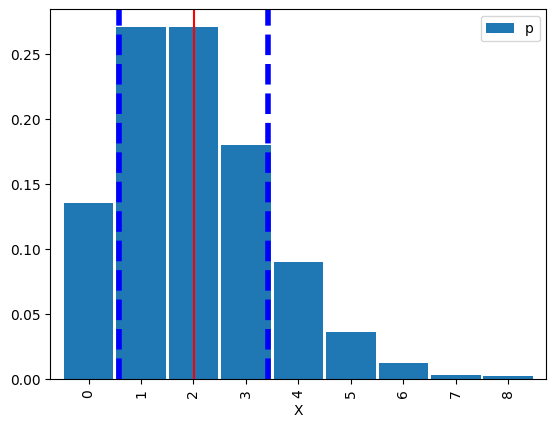

In [142]:
left, right = mu - std, mu + std

ax = df.plot.bar(x = 'X', y = 'p', width = .95)
ax.axvline(mu, color='r')
ax.axvline(mu - (std), color = 'b', linestyle='dashed', linewidth = 4)
ax.axvline(mu + (std), color = 'b', linestyle='dashed', linewidth = 4)

display(left, right)

In [146]:
df['p'][1:4].sum()*100

72.2

### Example - Detecting Fraud

In [205]:
data = {
    'first digit': [_ for _ in range(1, 10)],
    'predicted': [0.301, 0.176, 0.125, 0.097, 0.079, .067, .058, .051, .046]
}
print(data['first digit'])
df = pd.DataFrame(data)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


(3.4410000000000003, 5.902812137430475, 0.9791878625695261, 2.4618121374304742)

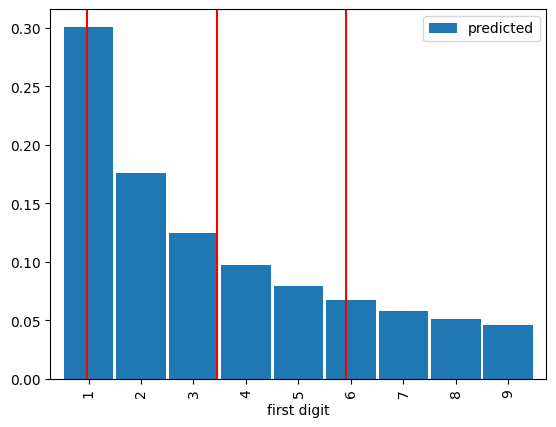

In [207]:
mu = (df['first digit'].values * df['predicted'].values).sum()
variance = ((df['first digit']- mu)**2*df['predicted']).sum()
std = variance **.5

ax = df.plot.bar(x = 'first digit', y = 'predicted', width = .95, align='center')
for value in [mu, mu + std, mu - std]:
    ax.axvline(value-1, color = 'r')
mu, mu+std, mu-std, std

In [209]:
df['relative'] = [0.305, 0.178, 0.126, 0.096, 0.078, .066, .056, .050, .045]
df

,first digit,predicted,relative
0,1,0.301,0.305
1,2,0.176,0.178
2,3,0.125,0.126
3,4,0.097,0.096
4,5,0.079,0.078
5,6,0.067,0.066
6,7,0.058,0.056
7,8,0.051,0.050
8,9,0.046,0.045


3.4410000000000003 0.9791878625695261 5.902812137430475


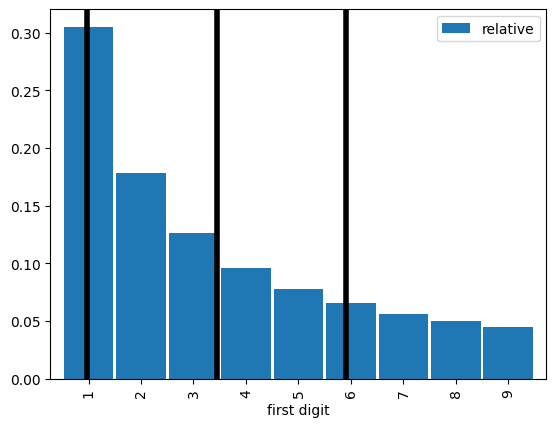

In [212]:
ax = df.plot(kind = 'bar', width = .95, x = 'first digit', y = ['relative'])
mu = (df['predicted']*df['first digit']).sum()
variance = ((df['first digit'] - mu)**2 * df['predicted']).sum()
std = variance ** 0.5
left, right = mu - std, mu + std
for value in [mu, left, right]:
    ax.axvline(value - 1, color='black', linewidth = 4)
print(mu, left, right)

### Example - Shoe Size

In [237]:
import math
data = {
    'X': [6.5 + i*0.5 for i in range(0,int(math.ceil((15.5-6.5)/0.5) + 1))],
    'p': [.001, .003, .007, .018, .034, .054, .08, .113, .127, .134, .122, .107, .085, .052, .032,
    .016, .009, .004, .0002]
}
df = pd.DataFrame(data)

In [239]:
df

,X,p
0,6.5,0.0010
1,7.0,0.0030
2,7.5,0.0070
3,8.0,0.0180
4,8.5,0.0340
5,9.0,0.0540
6,9.5,0.0800
7,10.0,0.1130
8,10.5,0.1270
9,11.0,0.1340


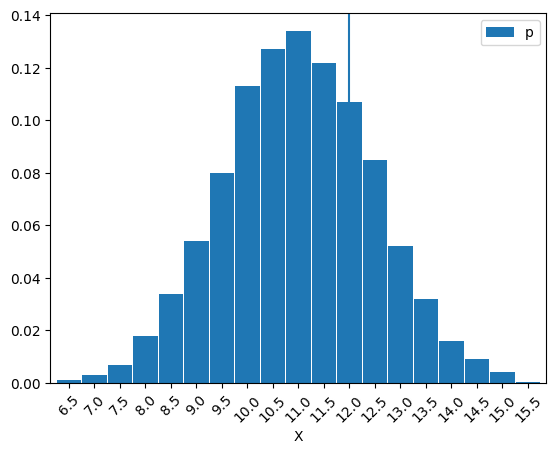

In [258]:
ax = df.plot(kind='bar', x = 'X', y = 'p', width = .95, rot=45)
ax.axvline(11)

In [255]:
prob_9_or_less = df['X'][:5]
prob_9_or_less

0    6.5
1    7.0
2    7.5
3    8.0
4    8.5
Name: X, dtype: float64

In [247]:
(9 - 6.5)

2.5